In [1]:
import seaborn as sns
sns.set()

In [3]:
import pandas as pd

housing_df = pd.read_csv("./king_county_housing_data.csv", index_col=0)

print('DataFrame shape:', housing_df.shape)
housing_df.head()

DataFrame shape: (17269, 19)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503


### Load the pickle data dictionary file

In [5]:
import pickle

with open('./king_county_housing_dict.pickle', 'rb') as f:
    housing_dict = pickle.load(f)
    
housing_dict

{'id': 'House identifier',
 'date': 'Date house was sold',
 'price': 'Price',
 'bedrooms': 'Number of Bedrooms',
 'bathrooms': 'Number of bathrooms',
 'sqft_living': 'Square footage of the home',
 'sqft_lot': 'Square footage of the lot',
 'floors': 'Total floors (levels) in house',
 'waterfront': 'Whether house has view to a waterfront',
 'view': 'Number of times a house has been viewed',
 'condition': 'How good the condition is ( Overall )',
 'grade': 'Overall grade given to the housing unit',
 'sqft_above': 'Square footage of house apart from basement',
 'sqft_basement': 'Square footage of the basement',
 'yr_built': 'Year Built',
 'zipcode': 'Zip code',
 'lat': 'Latitude coordinate',
 'long': 'Longitude coordinate',
 'sqft_living15': 'Living room area in 2015 (implies some renovations)',
 'sqft_lot15': 'Lot size area in 2015 (implies some renovations)'}

In [6]:
X = housing_df.drop(columns=['date', 'zipcode', 'price'])
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


In [7]:
y = housing_df['price']
y.head()

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
Name: price, dtype: float64

### Data Visualization

In [8]:
import matplotlib.pyplot as plt
from ipywidgets import widgets

def scatter_plot(column):
    plt.plot(X[column], y, 'k.')
    plt.xlabel(housing_dict[column])
    plt.ylabel('Home price')
    plt.title('Home Price vs {}'.format(housing_dict[column]))

widgets.interact(scatter_plot, column=X.columns);

interactive(children=(Dropdown(description='column', options=('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lo…

### Single Linear Regression Model

Train a single linear regression model to predict the home calue based on the living area square footage

In [9]:
X_sq_ft = X[['sqft_living']]
X_sq_ft.head()

,sqft_living
id,
7129300520,1180
6414100192,2570
5631500400,770
2487200875,1960
1954400510,1680


In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

sq_footage_model = lr.fit(X_sq_ft, y)

In [11]:
y_predicted = lr.predict(X_sq_ft)

Visualization to compare the actual data vs trained model

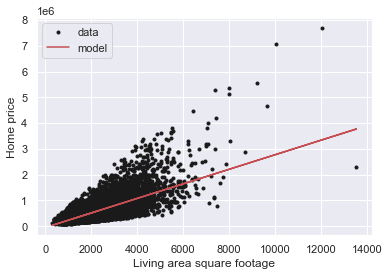

In [12]:
plt.plot(X_sq_ft, y, 'k.', label='data')
plt.plot(X_sq_ft, y_predicted, 'r-', label='model')
plt.xlabel('Living area square footage')
plt.ylabel('Home price')
plt.legend();

Evaluate Model Statistically

In [13]:
from sklearn import metrics

In [14]:
sq_footage_mse = metrics.mean_squared_error(y, y_predicted)

print('Training mean squared error for square footage model: ', sq_footage_mse)

Training mean squared error for square footage model:  68497393870.33039


In [15]:
sq_footage_r2 = metrics.r2_score(y, y_predicted)

print('Training R^2 for square footage model:', sq_footage_r2)

Training R^2 for square footage model: 0.49402110730976634


### Scaled model with pipeline

Build a linear regression model which predicts the home value based on living area square footage and number of bedrooms

In [16]:
X_sq_ft_bedrooms = X[['sqft_living', 'bedrooms']]
X_sq_ft_bedrooms.head()

,sqft_living,bedrooms
id,,
7129300520,1180,3
6414100192,2570,3
5631500400,770,2
2487200875,1960,4
1954400510,1680,3


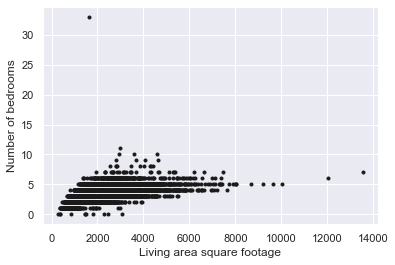

In [17]:
plt.plot(X_sq_ft_bedrooms['sqft_living'], X_sq_ft_bedrooms['bedrooms'], 'k.')

plt.xlabel('Living area square footage')
plt.ylabel('Number of bedrooms');

### Feature Engineering - Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X_sq_ft_bedrooms)

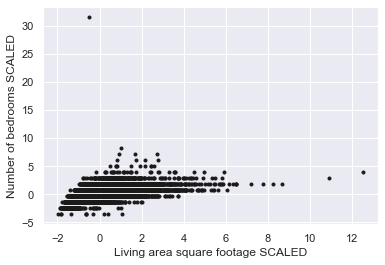

In [21]:
plt.plot(X_scaled[:, 0], X_scaled[:, 1], 'k.')

plt.xlabel('Living area square footage SCALED')
plt.ylabel('Number of bedrooms SCALED');

In [22]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("feature scaling", StandardScaler()),
                 ("linear regression", LinearRegression())])

pipeline_predictor = pipe.fit(X_sq_ft_bedrooms, y)
y_pred = pipeline_predictor.predict(X_sq_ft_bedrooms)

Evaluate Model Statistically

In [23]:
scaled_model_r2 = metrics.r2_score(y, y_pred)

print('Training R^2 for scaled model:', scaled_model_r2)

Training R^2 for scaled model: 0.5074181222218166


In [25]:
scaled_model_mse = metrics.mean_squared_error(y, y_pred)

print('Training mean squared error for scaled model: ', scaled_model_mse)

Training mean squared error for scaled model:  66683759704.21271


### Full Linear Regression Model

Create a linear model using all numerical features of the dataset.

In [26]:
X_full_model = housing_df.drop(columns=['date', 'zipcode', 'price'])
X_full_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


In [27]:
lr_many_features = LinearRegression()

full_model = lr_many_features.fit(X_full_model, y)

y_pred1 = full_model.predict(X_full_model)

Evaluate Model Statistically

In [28]:
full_model_r2 = metrics.r2_score(y, y_pred1)

print('Training R^2 for full model:', full_model_r2)

Training R^2 for full model: 0.6952633946485791


Display the equation for the linear model

In [29]:
print('y_predicted_full_model = \n' +
      '\n  + '.join(['{} * {}'.format(val, col) for val, col in list(zip(full_model.coef_, X_full_model.columns))])
      +'\n  + {}'.format(full_model.intercept_))

y_predicted_full_model = 
-33264.4013944409 * bedrooms
  + 44801.55150281802 * bathrooms
  + 111.36039454340641 * sqft_living
  + 0.10954111021945241 * sqft_lot
  + 1663.2396240544444 * floors
  + 566775.5420651176 * waterfront
  + 48536.9762583504 * view
  + 26398.105612239076 * condition
  + 98783.04209070872 * grade
  + 69.19537875868744 * sqft_above
  + 42.1650158729599 * sqft_basement
  + -2652.2568040141987 * yr_built
  + 556423.9509920526 * lat
  + -108803.66663236279 * long
  + 23.877985705386816 * sqft_living15
  + -0.4044373491526081 * sqft_lot15
  + -35252644.029572316


### Polynomial model

Some features from the data seem to have non-linear behavior. We will use PolynomialFeatures transformer to generate the second degree versions of each of the features.

In [30]:
X_full_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


In [31]:
# Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Create the transformer
polynomial_transformer = PolynomialFeatures(2)

In [32]:
X_transformed = polynomial_transformer.fit_transform(X_full_model)

In [36]:
X_transformed.shape # 153 columns now

(17269, 153)

In [33]:
# Create the pipeline

lr_poly = Pipeline([('standard_scaler', StandardScaler()),
                    ('polynomial_trans', PolynomialFeatures(2)),
                    ('lr', LinearRegression())])

poly_pipeline = lr_poly.fit(X_full_model, y)

y_pred2 = poly_pipeline.predict(X_full_model)

Evaluate Model Statistically

In [34]:
poly_model_r2 = metrics.r2_score(y, y_pred2)

print('Training R^2 for polynomial ridge model:', poly_model_r2)

Training R^2 for polynomial ridge model: 0.8117941709559795


R^2 increases significantly to 81% after using the Polynomial model to predict the home value. It means 81% of the dependent variable 'home value' can be explained by all the indenpendent variables X_transformed. 